<a href="https://colab.research.google.com/github/estelacruz/Data-Alchemist/blob/main/PartSix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 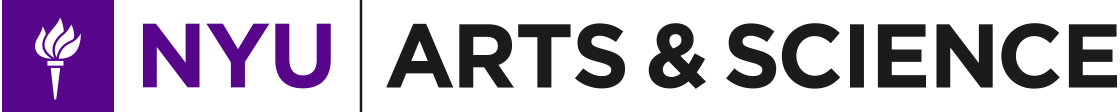



---



**Data Management & Analysis**


**Estela Bobadilla-Cruz**


---










Name of Database from US Census: Poverty Statistics: CPS & SAIPE (Time Series: various years)

Explanation From Cite: "

The **CPS ASEC** provides the most timely and accurate national data on income and is the official source of national poverty estimates, hence it is the preferred source for national analysis.  The CPS ASEC provides a consistent historical time series beginning in 1959 at the national level and can also be used to look at state-level trends and differences going back to 1980. However, the relatively large sampling errors of state-level estimates for smaller states somewhat limit their usefulness.

The **American Community Survey (ACS)** releases annual subnational estimates of income and poverty for all places, counties, and metropolitan areas with a population of at least 65,000 as well as the nation and the states. The sample size of this survey is over 3 million addresses per year, making the ACS exceptionally useful for subnational analyses. Three-year period estimates are available for areas and subpopulations as small as 20,000 and five-year period estimates are available for all geographies, including census tracts, block groups and small subgroups of the population. ACS estimates are updated every year. Because of its large sample size, estimates from the fully implemented ACS provide the best survey-based state level income and poverty estimates. The ACS was fully-implemented in 2006.


The **Small Area Income and Poverty Estimates (SAIPE)** program produces single-year estimates of median household income and poverty for states and all counties, as well as population and poverty estimates for school districts. Since SAIPE estimates combine ACS data with administrative and other data, SAIPE estimates generally have lower variance than ACS estimates but are released later because they incorporate ACS data in the models. For counties and school districts, particularly those with populations below 65,000, the SAIPE program provides the most accurate subnational estimates of poverty. For counties, SAIPE generally provides the best single-year estimates of median household income."

cite: https://www.census.gov/data/developers/data-sets/Poverty-Statistics.html

In [ ]:
# install MongoDB on Colab
!apt install mongodb
# start the service
!service mongodb start

# import and start pymongo
from pymongo import MongoClient
client = MongoClient()
client.list_database_names() # ['admin', 'local']

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libpcap0.8 libstemmer0d libyaml-cpp0.5v5 mongo-tools mongodb-clients
  mongodb-server mongodb-server-core
The following NEW packages will be installed:
  libpcap0.8 libstemmer0d libyaml-cpp0.5v5 mongo-tools mongodb mongodb-clients
  mongodb-server mongodb-server-core
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 53.1 MB of archives.
After this operation, 215 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpcap0.8 amd64 1.8.1-6ubuntu1.18.04.2 [118 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libstemmer0d amd64 0+svn585-1build1 [62.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 lib

['admin', 'local']

In [ ]:
import json
import requests
import pandas as pd
# get data
#json_data = requests.get("https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,STABREV,COUNTY,SAEPOV5_17R_PT,SAEPOV0_4_PT,SAEPOVALL_PT&for=state:*&time=2019"
#).json()
#print(json_data)

In [ ]:
#SAEPOVALL_PT = All ages in Poverty, Count Estimate
#SAEPOV0_4_PT = Ages 0-4 in Poverty, Count Estimate
#SAEPOV5_17R_PT = Ages 5-17 in Families in Poverty, Count Estimate
#STABREV = state abre
apiUrl = "https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,STABREV,COUNTY,SAEPOV5_17R_PT,SAEPOV0_4_PT,SAEPOVALL_PT&for=state:*&time=2019"
r = requests.get(apiUrl)
data = r.text
parsed = json.loads(data)
d = parsed[1:]
#parsed
allStates19 = pd.DataFrame(d, columns = ['NAME', 'STABREV','COUNTY', 'SAEPOV5_17R_PT', 'SAEPOV0_4_PT', 'SAEPOVALL_PT', 'time', 'state'])
allStates19

#primary key = county
#foreign key = state | Name | stabrev

,NAME,STABREV,COUNTY,SAEPOV5_17R_PT,SAEPOV0_4_PT,SAEPOVALL_PT,time,state
0,Alabama,AL,000,161670,69236,747478,2019,01
1,Alaska,AK,000,14945,7350,73033,2019,02
2,Arizona,AZ,000,214561,88440,963007,2019,04
3,Arkansas,AR,000,99539,45995,468575,2019,05
4,California,CA,000,969127,362735,4560419,2019,06
5,Colorado,CO,000,97101,37031,531331,2019,08
6,Connecticut,CT,000,69310,24998,343101,2019,09
7,Delaware,DE,000,21885,9428,106227,2019,10
8,District of Columbia,DC,000,16359,9565,94985,2019,11
9,Florida,FL,000,512439,224337,2681832,2019,12


In [ ]:
#SAEPOVALL_PT = All ages in Poverty, Count Estimate
#SAEPOV0_4_PT = Ages 0-4 in Poverty, Count Estimate
#SAEPOV5_17R_PT = Ages 5-17 in Families in Poverty, Count Estimate
#STABREV = state abre
api_url = "https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,STABREV,COUNTY,SAEPOV5_17R_PT,SAEPOV0_4_PT,SAEPOVALL_PT&for=state:*&time=2020"
res = requests.get(api_url)
dataOut = res.text
parse = json.loads(dataOut)
dParsed = parse[1:]
#parsed
allStates20 = pd.DataFrame(dParsed, columns = ['NAME', 'STABREV','COUNTY', 'SAEPOV5_17R_PT', 'SAEPOV0_4_PT', 'SAEPOVALL_PT', 'time', 'state'])
allStates20


,NAME,STABREV,COUNTY,SAEPOV5_17R_PT,SAEPOV0_4_PT,SAEPOVALL_PT,time,state
0,Alabama,AL,000,152810,66169,714568,2020,01
1,Alaska,AK,000,13944,6852,68714,2020,02
2,Arizona,AZ,000,197320,79944,932555,2020,04
3,Arkansas,AR,000,96688,43491,448665,2020,05
4,California,CA,000,898424,327414,4419167,2020,06
5,Colorado,CO,000,89390,36625,511346,2020,08
6,Connecticut,CT,000,60753,20781,333435,2020,09
7,Delaware,DE,000,20536,9067,104400,2020,10
8,District of Columbia,DC,000,19568,8515,101959,2020,11
9,Florida,FL,000,504335,194751,2642642,2020,12


In [ ]:
#'NAME', 'STABREV', 'COUNTY', 'SAEPOV5_17R_PT', 'SAEPOV0_4_PT', 'SAEPOVALL_PT', 'time', 'state'

statesQuery= '''
CREATE TABLE states (
    NAME text PRIMARY KEY ,
    STABREV text,
    COUNTY text,
    SAEPOV5_17R_PT text, 
    SAEPOV0_4_PT text, 
    SAEPOVALL_PT text, 
    time text, 
    state text

);
'''


In [ ]:
# within "poverty", create collection/table called "states"
#states = db['states']
#db.states.delete_many({})
# contains :
#SAEPOVALL_PT = All ages in Poverty, Count Estimate
#SAEPOV0_4_PT = Ages 0-4 in Poverty, Count Estimate
#SAEPOV5_17R_PT = Ages 5-17 in Families in Poverty, Count Estimate
#STABREV = state abre

In [ ]:
count = 0
#'NAME', 'STABREV', 'COUNTY', 'SAEPOV5_17R_PT', 'SAEPOV0_4_PT', 'SAEPOVALL_PT', 'time', 'state'
for x in range(len(d)):
  #print(d[x])
  count += 1

#print(count)
#print(len(json_data)-1)

Data from another cite: 
SAINC1 State annual personal income summary: personal income
Personal income (Millions of dollars)

cite: https://apps.bea.gov/iTable/?reqid=70&step=1&acrdn=2#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyNCwyOSwyNSwzMSwyNiwyNywzMCwzMF0sImRhdGEiOltbIlRhYmxlSWQiLCIyMSJdLFsiQ2xhc3NpZmljYXRpb24iLCJOb24tSW5kdXN0cnkiXSxbIk1ham9yX0FyZWEiLCIwIl0sWyJTdGF0ZSIsWyIwIl1dLFsiQXJlYSIsWyIwMTAwMCIsIjAyMDAwIiwiMDQwMDAiLCIwNTAwMCIsIjA2MDAwIiwiMDgwMDAiLCIwOTAwMCIsIjEwMDAwIiwiMTEwMDAiLCIxMjAwMCIsIjEzMDAwIiwiMTUwMDAiLCIxNjAwMCIsIjE3MDAwIiwiMTgwMDAiLCIxOTAwMCIsIjIwMDAwIiwiMjEwMDAiLCIyMjAwMCIsIjIzMDAwIiwiMjQwMDAiLCIyNTAwMCIsIjI2MDAwIiwiMjcwMDAiLCIyODAwMCIsIjI5MDAwIiwiMzAwMDAiLCIzMTAwMCIsIjMyMDAwIiwiMzMwMDAiLCIzNDAwMCIsIjM1MDAwIiwiMzYwMDAiLCIzNzAwMCIsIjM4MDAwIiwiMzkwMDAiLCI0MDAwMCIsIjQxMDAwIiwiNDIwMDAiLCI0NDAwMCIsIjQ1MDAwIiwiNDYwMDAiLCI0NzAwMCIsIjQ4MDAwIiwiNDkwMDAiLCI1MDAwMCIsIjUxMDAwIiwiNTMwMDAiLCI1NDAwMCIsIjU1MDAwIiwiNTYwMDAiXV0sWyJTdGF0aXN0aWMiLCIxIl0sWyJVbml0X29mX21lYXN1cmUiLCJMZXZlbHMiXSxbIlllYXIiLFsiMjAxOSJdXSxbIlllYXJCZWdpbiIsIi0xIl0sWyJZZWFyX0VuZCIsIi0xIl1dfQ==

In [ ]:
import pymongo
import pprint
#from google.colab import drive
#drive.mount('/content/gdrive')
from google.colab import files
uploaded = files.upload() #2019_data_nc.csv
u = files.upload() #2020_data_nc.csv

Saving 2019_data_nc.csv to 2019_data_nc.csv


Saving 2020_data_nc.csv to 2020_data_nc.csv


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')
d_20 = pd.read_csv("2020_data_nc.csv")
d_20

#primary key = geoname

,"SAINC1 State annual personal income summary: personal income, population, per capita personal income",Unnamed: 1,Unnamed: 2
0,SAINC1 State annual personal income summary: p...,NaN,NaN
1,State or DC,NaN,NaN
2,GeoFips,GeoName,2020.0
3,1000,Alabama,232040.3
4,2000,Alaska *,45965.1
5,4000,Arizona,375601.3
6,5000,Arkansas,142038.5
7,6000,California,2790523.5
8,8000,Colorado,378051.4
9,9000,Connecticut,282486.1


In [ ]:
d_19 = pd.read_csv("2019_data_nc.csv")
d_19 = d_19[3:]
d_19
#primary key = geoname

,"SAINC1 State annual personal income summary: personal income, population, per capita personal income",Unnamed: 1,Unnamed: 2
3,1000,Alabama,216587.5
4,2000,Alaska *,45056.8
5,4000,Arizona,340259.8
6,5000,Arkansas,133161.4
7,6000,California,2567425.6
8,8000,Colorado,356341.3
9,9000,Connecticut,272459.4
10,10000,Delaware,53202.5
11,11000,District of Columbia,58203.2
12,12000,Florida,1165093.1


Cleaning Up

In [ ]:
d_19.rename(columns={'SAINC1 State annual personal income summary: personal income, population, per capita personal income': 'index', 'Unnamed: 1': 'State Name', 'Unnamed: 2': 'personal_income'}, inplace=True)
for col in d_19.columns:
  print(col)

index
State Name
personal_income


In [ ]:
d_19 = d_19[:51]
d_19

,index,State Name,personal_income
3,1000,Alabama,216587.5
4,2000,Alaska *,45056.8
5,4000,Arizona,340259.8
6,5000,Arkansas,133161.4
7,6000,California,2567425.6
8,8000,Colorado,356341.3
9,9000,Connecticut,272459.4
10,10000,Delaware,53202.5
11,11000,District of Columbia,58203.2
12,12000,Florida,1165093.1


In [ ]:
d_20 = d_20[3:]
d_20.rename(columns={'SAINC1 State annual personal income summary: personal income, population, per capita personal income': 'index', 'Unnamed: 1': 'State Name', 'Unnamed: 2': 'personal_income'}, inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
d_20 = d_20[:51]
d_20

,index,State Name,personal_income
3,1000,Alabama,232040.3
4,2000,Alaska *,45965.1
5,4000,Arizona,375601.3
6,5000,Arkansas,142038.5
7,6000,California,2790523.5
8,8000,Colorado,378051.4
9,9000,Connecticut,282486.1
10,10000,Delaware,55866.8
11,11000,District of Columbia,61925.5
12,12000,Florida,1235793.4
